## Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
#load the data 
#url = "Wine_data.csv"
dataframe=pd.read_csv("d:/data/winequality-red.csv") 
arr = dataframe.values 
X = arr[:, 1:14] 
Y = arr[:, 0]

#initialize the base regressor
base_cls = DecisionTreeRegressor()

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Kfold = model_selection.KFold(n_splits=3)

In [6]:
#define bagging regressor
num_trees = 500
model_reg = BaggingRegressor(base_estimator = base_cls, n_estimators =num_trees,random_state=5)
results = model_selection.cross_val_score(model_reg,X_train,y_train,cv = Kfold)
results.mean()

#fit the model on the whole dataset
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

#Accuracy Scores
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
acc = cross_val_score(model_reg,X_train,y_train,cv = 10)
acc.mean()

Mean Absolute Error: 0.37821912500000077
Mean Squared Error: 0.3175001274561114
Root Mean Squared Error 0.563471496578231


0.8725240825818797

In [ ]:
# Now again let’s compare the results without the bagging Regressor,  WITH decision tree regressor ONLY

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
dt_model= DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error (y_test,y_pred_dt))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error (y_test,y_pred_dt)))
acc = cross_val_score(dt_model, X_train,y_train,cv = 10)
acc.mean()

Mean Absolute Error: 0.49468750000000006
Mean Squared Error: 0.62846875
Root Mean Squared Error 0.7927602096472804


0.7253915907752022

In [ ]:
# Homework: design an app for this problem (gradio)

## Classification

In [1]:
from sklearn.metrics import confusion_matrix

#lets convert the dataset into classification problem
dataframe1  = dataframe.copy()
dataframe1["quality"] = np.where(dataframe['quality']>=5,1,0)

NameError: name 'dataframe' is not defined

In [12]:
arr = dataframe1.values 
X = arr[:, 1:11] 
Y = arr[:, 11]
kfold = model_selection.KFold(n_splits=3)

#initialize the base classifier
base_cls = DecisionTreeClassifier()

#no. of base classifiers
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
#bagging classifier
num_trees = 500
model_classifier = BaggingClassifier(base_estimator = base_cls,n_estimators=num_trees,random_state=3)
results1 = model_selection.cross_val_score(model_classifier,X_train,y_train,cv = kfold)
results1.mean()

# fit the model on the whole dataset
model_classifier.fit(X_train, y_train)
y_pred = model_classifier.predict(X_test)
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print("Accuracy Score",metrics.accuracy_score(y_test, y_pred))
    print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
    print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
    print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
    print("F1 Score",metrics.f1_score(y_test, y_pred))
    print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
    print("Classification Report \n", metrics.classification_report(y_test,y_pred))
evaluation_score(y_test,y_pred)
acc = cross_val_score(model_classifier,X_train,y_train,cv = 10)
acc.mean()

Confusion Matrix 
 [[  1  12]
 [  2 305]]
Accuracy Score 0.95625
Balanced Accuracy  0.5352042094713104
Recall Accuracy Score~TP 0.993485342019544
Precision Score ~ Ratio of TP 0.9621451104100947
F1 Score 0.9775641025641026
auc_roc score 0.5352042094713104
Classification Report 
               precision    recall  f1-score   support

         0.0       0.33      0.08      0.12        13
         1.0       0.96      0.99      0.98       307

    accuracy                           0.96       320
   macro avg       0.65      0.54      0.55       320
weighted avg       0.94      0.96      0.94       320



0.961675688976378

In [14]:
# Now again let’s compare the results without the bagging classifier WITH decision tree classifier ONLY

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print("Accuracy Score",metrics.accuracy_score(y_test, y_pred))
    print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
    print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
    print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
    print("F1 Score",metrics.f1_score(y_test, y_pred))
    print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
    print("Classification Report \n", metrics.classification_report(y_test,y_pred))
evaluation_score(y_test,y_pred)
acc = cross_val_score(dt_model, X_train,y_train,cv = 10)
acc.mean()

Confusion Matrix 
 [[  1  12]
 [  2 305]]
Accuracy Score 0.95625
Balanced Accuracy  0.5352042094713104
Recall Accuracy Score~TP 0.993485342019544
Precision Score ~ Ratio of TP 0.9621451104100947
F1 Score 0.9775641025641026
auc_roc score 0.5352042094713104
Classification Report 
               precision    recall  f1-score   support

         0.0       0.33      0.08      0.12        13
         1.0       0.96      0.99      0.98       307

    accuracy                           0.96       320
   macro avg       0.65      0.54      0.55       320
weighted avg       0.94      0.96      0.94       320



0.9327632874015748

In [ ]:
################################################################################################################################

In [ ]:
# Homework: Design an app for this problem (gradio)

In [21]:
################################################################################################################################

In [2]:
from sklearn.datasets import load_breast_cancer,load_diabetes

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.ensemble import BaggingClassifier,BaggingRegressor 
from sklearn.model_selection import cross_val_score

Let’s start with classification. We can import our dataset, train our model and calculate the variance of some performance metric (let’s say the balanced accuracy) over 10-fold cross-validation.

In [5]:
X,y = load_breast_cancer(return_X_y=True) 
nb = GaussianNB() 
cross_val_score(nb,X,y,scoring="balanced_accuracy",cv=10).var() 

# The smalller the variance, the stable is the model.

0.0011182285777794419

This variance is a measure of the stability of the model.

Let’s now apply bagging using, for example, 10 models and half of the original column count. In real-life projects, you want to optimize these values using a hyperparameter tuning technique like gridsearch.

In [6]:
model = BaggingClassifier(GaussianNB(),n_estimators = 15, max_features = 0.5,random_state = 0, n_jobs = -1)

In [7]:
# Variance is, then:

cross_val_score(model,X,y,scoring="balanced_accuracy",cv=10).var() 

0.001299575584748743

As we can see, it is lower than the original variance. So, bagging has reduced the variance making our model more stable.

We can apply the same concept to regression as well. Let’s use a linear regression model and the R-squared metric.

In [8]:
X,y = load_diabetes(return_X_y=True) 
lr = LinearRegression() 
cross_val_score(lr,X,y,scoring="r2",cv=10).var() 

0.021606486588161965

In [9]:
# Let’s now apply a BaggingRegressor to our model and calculate the new variance:

model = BaggingRegressor(LinearRegression(),n_estimators = 10, max_features = 0.5,random_state = 0, n_jobs = -1) 
cross_val_score(model,X,y,scoring="r2",cv=10).var() 

0.013137024989029111

It’s half the original value. So, we have created a more stable model. Bagging is a very useful technique that mathematically increases the stability of a model.

In [31]:
################################################################################################################################

#### Voting wih Python using Scikit-Learn

In [10]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

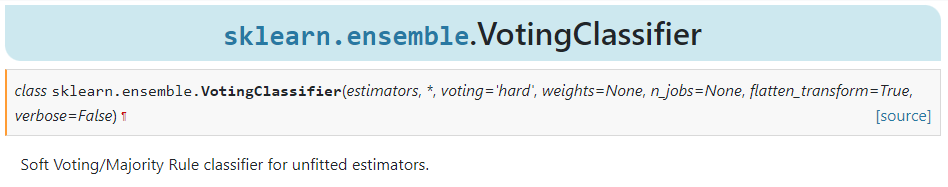

In [11]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
logistic = LogisticRegression()
knearest = KNeighborsClassifier(n_neighbors = 6)

voting = VotingClassifier(estimators = [('LR', logistic), ('KNN', knearest)], voting = 'soft')
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
voting.fit(X_train, y_train)
predicted = voting.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Voting accuracy score:{accuracy:.4f}')

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting accuracy score:0.9561


In [ ]:
################################################################################################################################

 #### Homework:

do the voting for these classifiers SVM, random forest, naive Bayes, decision tree, KNN

In [16]:
################################################################################################################################
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
logistic = LogisticRegression()
knearest = KNeighborsClassifier(n_neighbors=6)
svm = SVC(probability=True)  # Enable probability estimates for SVC
random_forest = RandomForestClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()

voting = VotingClassifier(estimators=[
    ('LR', logistic),
    ('KNN', knearest),
    ('SVM', svm),
    ('RF', random_forest),
    ('NB', naive_bayes),
    ('DT', decision_tree)],
    voting='soft')
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
voting.fit(X_train, y_train)
predicted = voting.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Voting accuracy score:{accuracy:.4f}')

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting accuracy score:0.9649


In [39]:
models = [logistic, knearest]
for model in models:
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    accuracy = accuracy_score(predicted, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name}: {accuracy:.4f}')

LogisticRegression: 0.9561
KNeighborsClassifier: 0.9474


C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

#### Bagging wih Python using Scikit-Learn

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 100)
rf_model.fit(X_train, y_train)
predicted = rf_model.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Random Forest accuracy:{accuracy:4f}')

Random Forest accuracy:0.956140


The accuracy score for the random forest classifier model we created above is 0.956140. This model, however, was set default in terms of the parameters. Detailed descriptions of the parameters can be found here. Let’s try another random Forest classifier model with different parameters.

In [41]:
rf_model_2 = RandomForestClassifier(n_estimators = 5, max_depth = 10, random_state = 100)
rf_model_2.fit(X_train, y_train)
predicted = rf_model_2.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Random Forest accuracy:{accuracy:4f}')

Random Forest accuracy:0.938596


In the model above, ‘n_estimators’ was set to be 5, and ‘max_depth’ was set to be 10. This means we combined only five decision tree classifiers and te maximum depth of the tree was set to be only ten. With these newly set parameter values, the accuracy decreased dramatically to 0.938596. This tells us that setting optimal parameters is very important to maximize the performance of a model.

C:\Users\aicyb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

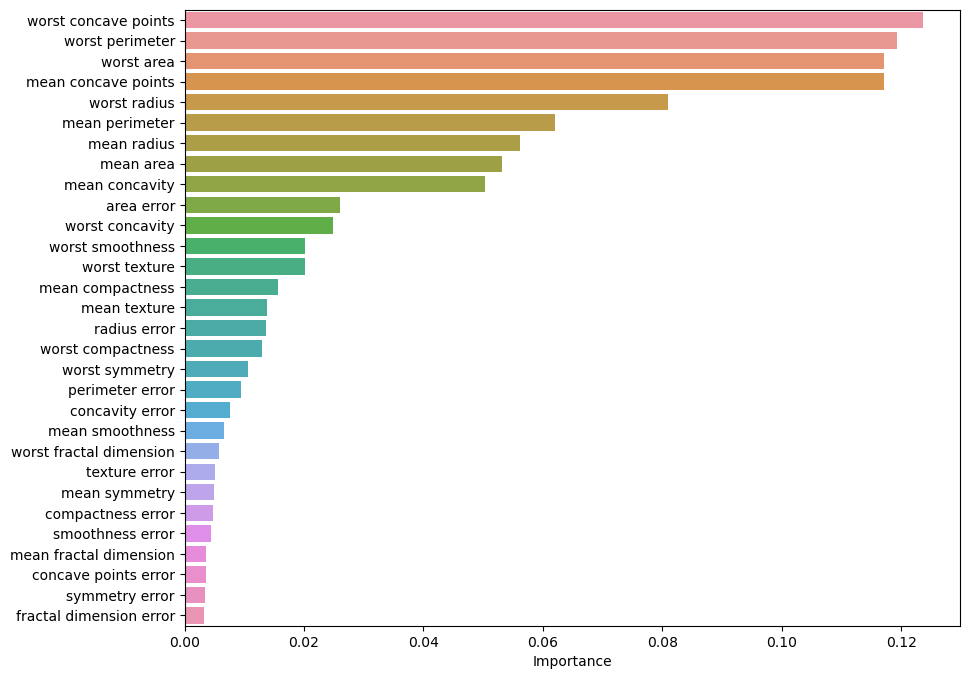

In [47]:
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame(rf_model.feature_importances_, columns = ['Importance'])
feature_importances.index = cancer.feature_names
feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 8))
sns.barplot(feature_importances['Importance'],feature_importances.index)

Visualizing the feature importances can be seen above. ‘Worst concave points’ has the highest feature importance followed by ‘worst perimeter’ and ‘worst area’. In other words, these variables have the largest effects on the classification process by our random forest model.